In [1]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class  
import math
from numpy.linalg import inv
from IPython.display import Image
from scipy.special import expit

In [2]:
#INPUT PARAMETERS:
n_power = 0
dm_mass =  1 #GeV
step_size_cross_section =2e-26 * pow(dm_mass,0.15)
f_sky = 0.4
Tcmb = 2.7255 #2.726
l_min = 2
l_max = 5000
relative_bulk_velocity = 0.
#2e-26 * pow(dm_mass,0.15) <- n=0 
#4e-19 * pow(dm_mass,0.70) <- n=2 for 1e-5 and 1e-4: 4e-19 * pow(dm_mass,1.2)
#6e-13 * pow(dm_mass,1.25) <- n=4 
#8e-7 * pow(dm_mass,1.3)   <- n=6 
#3e-34 * pow(dm_mass,0.5)     <- n=-2

list_param = ['omega_b','omega_dmb', 'h',  'A_s', 'n_s', 'tau_reio','sigma_dmb']
list_fiducial = [0.0224, 0.12, 0.6730804,  2.2e-9, 0.96, 0.07, 0.0]
list_step = [0.0001,     0.001,    0.004,   0.01e-9, 0.005, 0.02, step_size_cross_section]
list_param_step = list(zip(list_param, list_step))

import time
start_time = time.time()
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Starting Time =", current_time)

Starting Time = 13:20:01


In [3]:
# Define the CLASS input dictionary, use defaults
params = {
    'output': 'tCl pCl lCl','lensing': 'no','l_max_scalars': 5000,
    'omega_b': list_fiducial[0],'omega_dmb': list_fiducial[1],'h': list_fiducial[2],'A_s' : list_fiducial[3],'n_s' : list_fiducial[4], 'tau_reio' : list_fiducial[5],'sigma_dmb': list_fiducial[6],
    'm_dmb': dm_mass,
    'omega_cdm' : 1e-22,
    'n_dmb': n_power,
    'N_ur': 2.0328,
    'N_ncdm': 1,
    'm_ncdm': 0.06,
    'T_ncdm':0.71611,
    'Vrel_dmb': relative_bulk_velocity
          }

# The usual CLASS code for computing C_l - fiducial only:
cosmo = Class()
cosmo.set(params)
cosmo.compute()
fiducial = cosmo.raw_cl(5000)
cosmo.struct_cleanup()
cosmo.empty()
ell = fiducial['ell']
      
Cl_est_kk = []
for i in ell:
    if i < 2:
        Cl_est_kk.append(0)
    else:
        Cl_est_kk.append(1/4*(math.factorial(i+2)/math.factorial(i-2))*fiducial['pp'][i])

In [4]:
#SO (baseline) noise 
# All noise spectra are for lensing convergence; no factors of ell or 2pi.
# i.e. these can be plotted directly against C_ell_kappa_kappa.

data = np.genfromtxt('noise/SO/Apr17_mv_nlkk_deproj0_SENS1_fsky_16000_iterOn.csv',
                     dtype=None,
                     delimiter='')
noise_dat = np.transpose(data)
n_kk_3000 = noise_dat[1]





data2 = np.genfromtxt('noise/SO/SO_LAT_Nell_T_atmv1_baseline_fsky0p4_ILC_CMB.txt',
                     dtype=None,
                     delimiter=' ')
data3 = np.genfromtxt('noise/SO/SO_LAT_Nell_P_baseline_fsky0p4_ILC_CMB_B.txt',
                     dtype=None,
                     delimiter=' ')
noise_T = np.transpose(np.array([list(i) for i in data2]))
noise_P = np.transpose(np.array([list(i) for i in data3]))

#n_kk_3000 = noise_dat2[1]
# ells, N_lensing_TT, N_lensing_TE, N_lensing_EE, N_lensing_TB, N_lensing_EB, N_lensing_Pol (EE+EB), N_lensing_MV (all), N_curl_TT, N_curl_TE, N_curl_EE, N_curl_TB, N_curl_EB, N_curl_Pol (EE+EB), N_curl_MV (all)


In [5]:
noise_P[1][100-40:5001-40]

array([1.28225e-04, 1.26842e-04, 1.25491e-04, ..., 2.02294e-05,
       2.02366e-05, 2.02439e-05])

In [6]:
nl_tt = [1e100 for i in range(0,5001, 1)]
nl_tt[300:5001] = noise_T[1][300-40:5001-40]/((1.0e6*Tcmb)**2)

nl_ee = [1e100 for i in range(0,5001, 1)]
nl_ee[100:5001] = noise_P[1][100-40:5001-40]/((1.0e6*Tcmb)**2)

nl_kk = [1e100 for i in range(0, 5000, 1)]
nl_kk[30:2999] = n_kk_3000

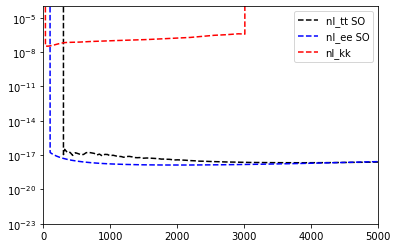

In [7]:
plt.plot(nl_tt , 'k--',label="nl_tt SO")
plt.plot(nl_ee , 'b--',label="nl_ee SO")
#plt.plot(fiducial['tt'], 'k-',label="Cl_tt")
#plt.plot(fiducial['ee'], 'b-',label="Cl_ee")
#plt.plot(Cl_est_kk, 'r-',label="Cl_kk")
plt.plot(nl_kk , 'r--',label="nl_kk")
plt.yscale('log')
#plt.xscale('log')
plt.ylim(1e-23,1e-4)
plt.xlim(0,5000)
plt.legend(loc="upper right")
#plt.title('SO n=-4 1 GeV')
plt.show()

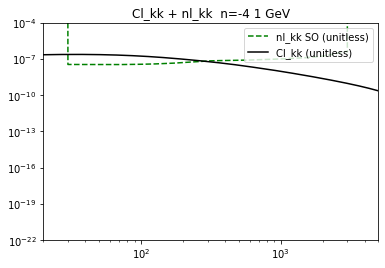

In [8]:
plt.plot(nl_kk , 'g--',label="nl_kk SO (unitless)")
plt.plot(Cl_est_kk, 'k-',label="Cl_kk (unitless)")
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-22,1e-4)
plt.xlim(20,5000)
plt.legend(loc="upper right")
plt.title('Cl_kk + nl_kk  n=-4 1 GeV')
plt.show()

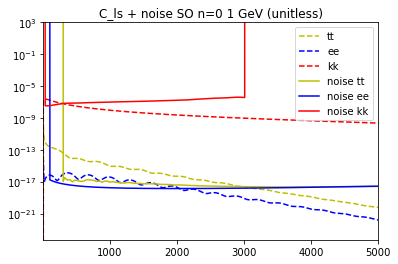

In [9]:
#fig, ax = plt.subplots(figsize=(6, 4))
plt.plot(fiducial['tt'], 'y--',label="tt")
plt.plot(fiducial['ee'], 'b--',label="ee")
plt.plot(Cl_est_kk, 'r--',label="kk")

plt.plot(nl_tt, 'y-',label="noise tt")
plt.plot(nl_ee, 'b-',label="noise ee")
plt.plot(nl_kk, 'r-',label="noise kk")


plt.yscale('log')
plt.ylim(5e-25,1000)
plt.xlim(2,5000)
plt.legend(loc="upper right")
plt.title('C_ls + noise SO n=0 1 GeV (unitless)')
plt.savefig("C_l_compare_n_0_1GeV_SO.png")
plt.show()

In [10]:
#For right and left C_l's:
def utility_function_call_CLASS(input_dict, l_max=5000):
    """Compute Cl with this utility function, repeat less code."""
    cosmo = Class()
    cosmo.set(input_dict)
    cosmo.compute()
    temp_cl = cosmo.raw_cl(l_max)
    cosmo.struct_cleanup()
    cosmo.empty()
    return temp_cl

In [11]:
def compute_derivative(params, theta, XY, stepsize, fiduc):
    left_params = params.copy()
    if theta == 'sigma_dmb':
        left_params[theta] = params[theta]
        right_params = params.copy()
        right_params[theta] = params[theta] + stepsize

        # get the C_l^XY and then compute the derivative!
        cl_XY_left = utility_function_call_CLASS(left_params)[XY]
        cl_XY_right = utility_function_call_CLASS(right_params)[XY]
        dClXY_dparam = (cl_XY_right - cl_XY_left) / (stepsize)
    else:
        left_params[theta] = params[theta] - stepsize
        right_params = params.copy()
        right_params[theta] = params[theta] + stepsize

        # get the C_l^XY and then compute the derivative!
        cl_XY_left = utility_function_call_CLASS(left_params)[XY]
        cl_XY_right = utility_function_call_CLASS(right_params)[XY]
        dClXY_dparam = (cl_XY_right - cl_XY_left) / (2 * stepsize)

    return dClXY_dparam / fiduc[XY], dClXY_dparam

def compute_d_cl(list_param_step, params, XY, fiducial):
    der_map = {}
    d_cl = {}
    for (par, stepsize) in list_param_step:
        norm_derivative, derivative = compute_derivative(params, par, XY, stepsize, fiducial)
        der_map[par] = norm_derivative
        d_cl[par] = derivative
    return d_cl

def compute_d_cl_der_map(list_param_step, params, XY, fiducial):
    der_map = {}
    d_cl = {}
    for (par, stepsize) in list_param_step:
        norm_derivative, derivative = compute_derivative(params, par, XY, stepsize, fiducial)
        der_map[par] = norm_derivative
        d_cl[par] = derivative
    return d_cl, der_map

In [12]:
'''#Plotting Derivatives
dict_params, dict_norm_der = compute_d_cl_der_map(list_param_step, params, 'tt', fiducial)
fig, axs = plt.subplots(2, 4, figsize=(10,4))
axs[0, 0].plot(dict_norm_der['omega_b'])
axs[0, 0].set_title('omega_b')
axs[0, 1].plot(dict_norm_der['omega_dmb'], 'tab:orange')
axs[0, 1].set_title(r'$\Omega_{dmb}$')
axs[0, 2].plot(dict_norm_der['h'], 'tab:brown')
axs[0, 2].set_title('h')
axs[0, 3].plot(dict_norm_der['A_s'], 'tab:green')
axs[0, 3].set_title('A_s')
axs[1, 0].plot(dict_norm_der['n_s'], 'tab:purple')
axs[1, 0].set_title(r'$n_s$')
axs[1, 1].plot(dict_norm_der['tau_reio'], 'tab:red')
axs[1, 1].set_title(r'$\tau$')
axs[1, 2].plot(dict_norm_der['sigma_dmb'], 'tab:red')
axs[1, 2].set_title('sigma_dmb')
for ax in axs.flat:
    ax.set(xlabel=r'$\ell$', ylabel=r'$(\partial C_{\ell}^{TT} / \partial \theta_i) / C_{\ell}^{TT}$')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
fig.savefig("fisher_plots/derivative_C_l_TT_{}GeV_n=2_SO.png".format(str(dm_mass)))'''

'#Plotting Derivatives\ndict_params, dict_norm_der = compute_d_cl_der_map(list_param_step, params, \'tt\', fiducial)\nfig, axs = plt.subplots(2, 4, figsize=(10,4))\naxs[0, 0].plot(dict_norm_der[\'omega_b\'])\naxs[0, 0].set_title(\'omega_b\')\naxs[0, 1].plot(dict_norm_der[\'omega_dmb\'], \'tab:orange\')\naxs[0, 1].set_title(r\'$\\Omega_{dmb}$\')\naxs[0, 2].plot(dict_norm_der[\'h\'], \'tab:brown\')\naxs[0, 2].set_title(\'h\')\naxs[0, 3].plot(dict_norm_der[\'A_s\'], \'tab:green\')\naxs[0, 3].set_title(\'A_s\')\naxs[1, 0].plot(dict_norm_der[\'n_s\'], \'tab:purple\')\naxs[1, 0].set_title(r\'$n_s$\')\naxs[1, 1].plot(dict_norm_der[\'tau_reio\'], \'tab:red\')\naxs[1, 1].set_title(r\'$\tau$\')\naxs[1, 2].plot(dict_norm_der[\'sigma_dmb\'], \'tab:red\')\naxs[1, 2].set_title(\'sigma_dmb\')\nfor ax in axs.flat:\n    ax.set(xlabel=r\'$\\ell$\', ylabel=r\'$(\\partial C_{\\ell}^{TT} / \\partial \theta_i) / C_{\\ell}^{TT}$\')\n# Hide x labels and tick labels for top plots and y ticks for right plots.\n

In [13]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 22.76081871986389 seconds ---


We need:
 
$$ F_{ij} = \sum_{\ell} \frac{2 \ell + 1}{2} f_{\mathrm{sky}} \mathrm{Tr}\,\left( \mathbf{C}_{\ell}^{-1} \frac{\partial \mathbf{C}_{\ell}}{\partial \theta_i} \mathbf{C}_{\ell}^{-1} \frac{\mathbf{C}_{\ell}}{\partial \theta_j} \right)$$
[Wu et al. 2014](https://arxiv.org/abs/1402.4108)





Let :
$$   \mathbf{Q}^{i}_{nm} =\, \left( {C}_{\ell}^{-1} \frac{\partial \mathbf{C}_{\ell}}{\partial \theta_i} \right)  =
  \left( {\begin{array}{cc}
    C_{\ell}^{TT} + N_{\ell}^{TT} & C_{\ell}^{TE} & 0 \\
   C_{\ell}^{TE} & C_{\ell}^{EE} + N_{\ell}^{EE} & 0 \\
   0 & 0 & C_{\ell}^{\kappa\kappa} + N_{\ell}^{\kappa\kappa} \\
  \end{array} } \right)^{-1}
   \left( {\begin{array}{cc}
    \frac{\partial C_{\ell}^{TT}}{\partial \theta_i } & \frac{\partial C_{\ell}^{TE}}{\partial \theta_i } & 0 \\
   \frac{\partial C_{\ell}^{TE}}{\partial \theta_i } &\frac{\partial C_{\ell}^{EE}}{\partial \theta_i } & 0 \\
    0 & 0 & \frac{\partial C_{\ell}^{\kappa\kappa}}{\partial \theta_i } \\
  \end{array} } \right)
$$
So that:
$$  F_{ij} = \sum_{\ell} \frac{2 \ell + 1}{2} f_{\mathrm{sky}} \mathrm{Tr}\,\left[  \mathbf{Q}_{i}  \mathbf{Q}_{j} \right]
$$

In [14]:
dC_lpp = compute_d_cl(list_param_step, params, 'pp', fiducial)

<ipython-input-11-7f0aee16fb63>:22: RuntimeWarning: invalid value encountered in true_divide
  return dClXY_dparam / fiduc[XY], dClXY_dparam


In [15]:
dC_lkk = {}
for k, array in dC_lpp.items():
    list_a = []
    for l, a in enumerate(array):
        if l < 2:
            list_a.append(0)
        else:
            list_a.append((1.0/4) * (math.factorial(l+2)/math.factorial(l-2)) * a)        
    dC_lkk[k] = np.array(list_a)
#print(dC_lkk)

In [16]:
MAT_d_cl = [ 
            [compute_d_cl(list_param_step, params, 'tt', fiducial), compute_d_cl(list_param_step, params, 'te', fiducial), 0],
            [compute_d_cl(list_param_step, params, 'te', fiducial), compute_d_cl(list_param_step, params, 'ee', fiducial), 0],
            [0, 0, dC_lkk]
           ]

MAT_cl = [ [fiducial['tt'] + nl_tt, fiducial['te'], 0], 
           [fiducial['te'], fiducial['ee'] + nl_ee, 0],
           [0, 0,  Cl_est_kk + nl_kk] ]

<ipython-input-11-7f0aee16fb63>:22: RuntimeWarning: invalid value encountered in true_divide
  return dClXY_dparam / fiduc[XY], dClXY_dparam


In [17]:
#for i in list_param:
def compute_Q_i(i, l):
    d_Cl_i = [[MAT_d_cl[0][0][i][l], MAT_d_cl[0][1][i][l], 0], 
              [MAT_d_cl[1][0][i][l], MAT_d_cl[1][1][i][l], 0],
              [0, 0, MAT_d_cl[2][2][i][l]]]
    
    cl = [[MAT_cl[0][0][l], MAT_cl[0][1][l], 0],
          [MAT_cl[1][0][l], MAT_cl[1][1][l], 0],
          [0, 0, MAT_cl[2][2][l]]]
    Q_i = np.matmul(inv(cl), d_Cl_i)
    return Q_i

def compute_F_ij(i, j):
    F_ij = 0
    for l in range(2, 5000):
        F_ij += 0.5*(2*l + 1) *f_sky * np.trace(np.matmul(compute_Q_i(i, l), compute_Q_i(j, l)))
    return F_ij

In [18]:
F =[]
for x in list_param:
    row = []
    for y in list_param:
        row.append(compute_F_ij(x, y))
    F.append(row)
    
covar = inv(F)
for n, i in enumerate(list_param):
    sigma_ii = np.sqrt(covar[n][n])
    print(i, sigma_ii)

omega_b 4.506318052804593e-05
omega_dmb 0.0009213179344938166
h 0.0034443114941238528
A_s 3.2261515940646395e-11
n_s 0.0029337970664110886
tau_reio 0.008718262715128504
sigma_dmb 6.917948102817465e-28


In [19]:
print(F)

[[3584147641.2863207, -1800433734.8818953, -88668523.67609839, -1.5657911380126016e+16, -94903788.1324267, -72055595.60349812, 2.0736752588843882e+32], [-1800433734.8818953, 1750787881.9506576, -29201887.856971662, 3.5953828320539868e+16, 176067015.4240997, 16563574.933011431, -2.667896208483044e+32], [-88668523.67609839, -29201887.856971655, 20247033.28831126, -3066566765812936.5, -12649776.88391743, 3649638.1059464784, 1.5029112242987621e+31], [-1.5657911380126016e+16, 3.5953828320539868e+16, -3066566765812936.5, 1.4418250451910467e+24, 5585324937608545.0, -1801522690384533.0, -6.836046446787507e+39], [-94903788.1324267, 176067015.4240997, -12649776.88391743, 5585324937608545.0, 24887173.29381523, -3686809.974521073, -3.364625464942868e+31], [-72055595.6034981, 16563574.933011431, 3649638.1059464784, -1801522690384533.0, -3686809.974521073, 7917801.968955774, 1.632549561236224e+29], [2.0736752588843882e+32, -2.667896208483044e+32, 1.5029112242987621e+31, -6.836046446787507e+39, -3.36

generating new axis
['omega_b', 'omega_dmb', 'h', 'A_s', 'n_s', 'tau_reio', 'sigma_dmb']


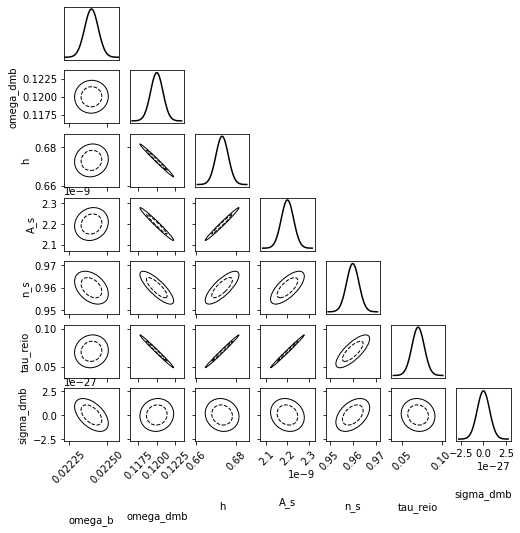

In [20]:
import fishchips.util
cov = np.linalg.inv(F)
fig, axes = fishchips.util.plot_triangle_base(list_param, list_fiducial, covar, labels=list_param);
fig.savefig("fisher_plots/triagular_ellipses_{}GeV_n=2_SO.png".format(str(dm_mass)))

In [22]:
dat = ('n-power=',n_power,'dm_mass=', dm_mass, 'stepsize =', step_size_cross_section,'fisher matrix =', F,i, "from cov matrix =",sigma_ii,"relative_bulk_velocity =", relative_bulk_velocity,"2-sigma zack's method =")

In [23]:
print(dat)

('n-power=', 0, 'dm_mass=', 1, 'stepsize =', 2e-26, 'fisher matrix =', [[3584147641.2863207, -1800433734.8818953, -88668523.67609839, -1.5657911380126016e+16, -94903788.1324267, -72055595.60349812, 2.0736752588843882e+32], [-1800433734.8818953, 1750787881.9506576, -29201887.856971662, 3.5953828320539868e+16, 176067015.4240997, 16563574.933011431, -2.667896208483044e+32], [-88668523.67609839, -29201887.856971655, 20247033.28831126, -3066566765812936.5, -12649776.88391743, 3649638.1059464784, 1.5029112242987621e+31], [-1.5657911380126016e+16, 3.5953828320539868e+16, -3066566765812936.5, 1.4418250451910467e+24, 5585324937608545.0, -1801522690384533.0, -6.836046446787507e+39], [-94903788.1324267, 176067015.4240997, -12649776.88391743, 5585324937608545.0, 24887173.29381523, -3686809.974521073, -3.364625464942868e+31], [-72055595.6034981, 16563574.933011431, 3649638.1059464784, -1801522690384533.0, -3686809.974521073, 7917801.968955774, 1.632549561236224e+29], [2.0736752588843882e+32, -2.667

In [24]:
outF = open("fisher_data/SO_n={}/{}GeV.txt".format(str(n_power),str(dm_mass)), "w")

for i in dat:
  # write line to output file
  outF.write(str(i))
  outF.write("\n")
outF.close()

In [25]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 77912.67618918419 seconds ---
